In [10]:
!pip install autokeras

^C


In [15]:
import pandas as pd
import tensorflow as tf
import teller as tr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from autokeras import StructuredDataRegressor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
import missingno as msno

In [17]:
df_p = pd.read_parquet('./500m.parquet', engine='pyarrow')
df_p

,id,name,cropa_aft,crevicea_aft,crevicel_lft,crossp_pft,ctowerp_pft,ctrlpntp_pft,admarea_aft,admbndl_lft,...,srtm_swiat,srtm_swiat_spadek,odl0roadl_lft,odl0foresta_aft,odl0builtupa_aft,odl0railrdl_lft,odl0farmp_pft,przej_wsp_nie_norm,przej_wsp_norm,geometry
0,91,NaN,0.0,0.0,0.0,0.0,0.0,0.0,251311.258476,0.000000,...,132.466667,0.822222,NaN,NaN,NaN,NaN,NaN,0.470619,0.854848,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
1,268,NaN,0.0,0.0,0.0,0.0,0.0,0.0,251202.373658,0.000000,...,159.511111,0.660000,NaN,NaN,NaN,NaN,NaN,0.479328,0.950551,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
2,7425,NaN,0.0,0.0,0.0,0.0,0.0,0.0,249976.815207,0.000000,...,156.222222,1.425926,NaN,NaN,NaN,NaN,NaN,0.495441,0.824066,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
3,143,NaN,0.0,0.0,0.0,0.0,0.0,0.0,251277.422141,0.000000,...,139.488889,0.933333,NaN,NaN,NaN,NaN,NaN,0.500422,0.823867,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
4,1990,NaN,0.0,0.0,0.0,0.0,0.0,0.0,250903.067780,121.386969,...,158.260000,2.333333,NaN,NaN,NaN,NaN,NaN,-0.848647,0.455641,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059,11887,NaN,0.0,0.0,0.0,0.0,0.0,1.0,248883.714798,0.000000,...,195.280000,3.183333,NaN,NaN,NaN,NaN,NaN,0.493784,0.839454,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
12060,11891,NaN,0.0,0.0,0.0,0.0,0.0,0.0,248886.820619,0.000000,...,183.955556,2.648148,NaN,NaN,NaN,NaN,NaN,0.501386,0.836371,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
12061,11930,NaN,0.0,0.0,0.0,0.0,0.0,0.0,248822.744207,0.000000,...,255.533333,1.518519,NaN,NaN,NaN,NaN,NaN,0.498662,0.854181,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
12062,11946,NaN,0.0,0.0,0.0,0.0,0.0,0.0,248789.817811,549.327670,...,247.462963,3.333333,NaN,NaN,NaN,NaN,NaN,-0.288820,0.540472,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...


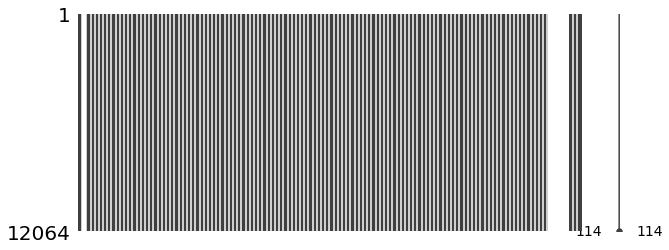

In [18]:
df_p = df_p.loc[:, (df_p != 0).any(axis=0)] #wycinanie pustych kolumn
msno.matrix(df_p, figsize=(10,4)) # test pustych wierszy
df_p =df_p.fillna(0) # wypełnianie Nan zerami

In [19]:
df_p.describe()

,id,name,crossp_pft,ctrlpntp_pft,admarea_aft,admbndl_lft,airportp_pft,athlflda_aft,bamboop_pft,beachl_lft,...,z_nieprzejezdne,srtm_swiat,srtm_swiat_spadek,odl0roadl_lft,odl0foresta_aft,odl0builtupa_aft,odl0railrdl_lft,odl0farmp_pft,przej_wsp_nie_norm,przej_wsp_norm
count,12064.000000,12064.0,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,...,12064.000000,12064.000000,12064.000000,12064.0,12064.0,12064.0,12064.0,12064.0,12064.000000,12064.000000
mean,6032.500000,0.0,0.009864,0.059682,250143.127191,64.474977,0.000083,7.642859,0.050481,0.574846,...,92274.274129,182.081800,2.121827,0.0,0.0,0.0,0.0,0.0,0.029941,0.689574
std,3482.721158,0.0,0.099666,0.237256,662.634476,177.276565,0.009104,310.500323,0.250715,13.917217,...,119469.927720,34.682273,1.055047,0.0,0.0,0.0,0.0,0.0,0.553779,0.191056
min,1.000000,0.0,0.000000,0.000000,248575.285711,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,120.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.900014,0.000000
25%,3016.750000,0.0,0.000000,0.000000,249608.159367,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,154.627778,1.333333,0.0,0.0,0.0,0.0,0.0,-0.370621,0.543249
50%,6032.500000,0.0,0.000000,0.000000,250169.616581,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,178.222222,1.907407,0.0,0.0,0.0,0.0,0.0,0.315587,0.767213
75%,9048.250000,0.0,0.000000,0.000000,250697.685362,0.000000,0.000000,0.000000,0.000000,0.000000,...,249504.046896,205.130556,2.648148,0.0,0.0,0.0,0.0,0.0,0.484900,0.842481
max,12064.000000,0.0,2.000000,2.000000,251364.343752,1383.129176,1.000000,23564.185364,3.000000,620.053527,...,251364.343752,286.822222,9.577778,0.0,0.0,0.0,0.0,0.0,0.505308,1.000000


In [20]:
df_p.shape

(12064, 120)

In [25]:
df_p.columns.to_list()[:-3]

['id',
 'name',
 'crossp_pft',
 'ctrlpntp_pft',
 'admarea_aft',
 'admbndl_lft',
 'airportp_pft',
 'athlflda_aft',
 'bamboop_pft',
 'beachl_lft',
 'bluffl_lft',
 'bndmontp_pft',
 'boulderp_pft',
 'bridgec_pft',
 'bridgel_lft',
 'buildnga_aft',
 'buildngp_pft',
 'cultxt_pft',
 'builtupa_aft',
 'cairnp_pft',
 'campsita_aft',
 'cartracl_lft',
 'cemetrya_aft',
 'cemetryp_pft',
 'chimneyp_pft',
 'cisternp_pft',
 'clearwa_aft',
 'clearwl_lft',
 'commbldp_pft',
 'commtwrp_pft',
 'contourl_lft',
 'curflowp_pft',
 'cutl_lft',
 'damc_pft',
 'depota_aft',
 'depressl_lft',
 'depressp_pft',
 'depthcl_lft',
 'disposa_aft',
 'ditchl_lft',
 'drditchl_lft',
 'elevp_pft',
 'embankl_lft',
 'farmp_pft',
 'fencel_lft',
 'firernga_aft',
 'fishfrma_aft',
 'fordc_pft',
 'foresta_aft',
 'forestl_lft',
 'forestp_pft',
 'grassa_aft',
 'grdelema_aft',
 'gullyl_lft',
 'hedgel_lft',
 'hutp_pft',
 'hydrotxt_pft',
 'inlandp_pft',
 'islanda_aft',
 'lakea_aft',
 'landsldp_pft',
 'monumntp_pft',
 'orchara_aft',
 'parka_a

In [26]:
#normalizacja
X = df_p.iloc[:,:-3]
X = MinMaxScaler().fit_transform(X)
y = df_p['przej_wsp_norm']
X.shape, y.shape

((12064, 117), (12064,))

In [29]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42, test_size=.2)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9651, 117), (2413, 117), (9651,), (2413,))

# MODEL

In [31]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,CategoryEncoding

In [91]:
model = Sequential()
model.add(Dense(X_train.shape[1], input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Normalization())
model.add(Dense(117, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

In [92]:
# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae' ]) # v1
# from keras.optimizers import SGD
# model.compile(loss='mse', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy','mae','mse' ]) # v2

In [86]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 117)               13806     
                                                                 
 normalization_4 (Normalizat  (None, 117)              235       
 ion)                                                            
                                                                 
 dense_23 (Dense)            (None, 117)               13806     
                                                                 
 dense_24 (Dense)            (None, 32)                3776      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                      

In [87]:
# fit the keras model on the dataset
result = model.fit(X_train, y_train, epochs=50, validation_split=.05,
                   # verbose=0,
                   )

Epoch 1/50
287/287 [==============================] - 1s 3ms/step - loss: 4.3989e-05 - mae: 0.0037 - val_loss: 9.9683e-04 - val_mae: 0.0491
Epoch 2/50
287/287 [==============================] - 1s 2ms/step - loss: 3.7587e-05 - mae: 0.0042 - val_loss: 0.0011 - val_mae: 0.0512
Epoch 3/50
287/287 [==============================] - 1s 2ms/step - loss: 2.7696e-05 - mae: 0.0037 - val_loss: 0.0011 - val_mae: 0.0523
Epoch 4/50
287/287 [==============================] - 1s 2ms/step - loss: 4.0153e-05 - mae: 0.0042 - val_loss: 0.0013 - val_mae: 0.0567
Epoch 5/50
287/287 [==============================] - 1s 2ms/step - loss: 1.7609e-05 - mae: 0.0034 - val_loss: 0.0015 - val_mae: 0.0597
Epoch 6/50
287/287 [==============================] - 1s 2ms/step - loss: 5.3768e-05 - mae: 0.0043 - val_loss: 0.0012 - val_mae: 0.0548
Epoch 7/50
287/287 [==============================] - 1s 2ms/step - loss: 3.9420e-05 - mae: 0.0038 - val_loss: 0.0011 - val_mae: 0.0528
Epoch 8/50
287/287 [========================

In [88]:
# evaluate the keras model
loss, mae  = model.evaluate(X, y)
print(f'loss:{loss}, \naccuracy: {accuracy},\nmae: {mae}, \nmse: {mse}')

377/377 [==============================] - 1s 1ms/step - loss: 0.0013 - mae: 0.0570
loss:0.0013296128017827868, 
accuracy: 0.00016578249051235616,
mae: 0.05704820901155472, 
mse: 0.002123709302395582


<Axes: >

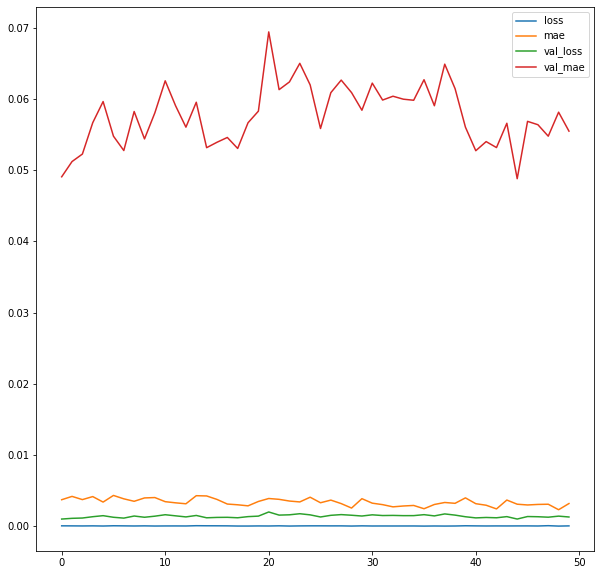

In [89]:
df_results = pd.DataFrame(result.history)
df_results.plot(figsize=(10,10))

In [90]:
df_results

,loss,mae,val_loss,val_mae
0,0.000044,0.003713,0.000997,0.049091
1,0.000038,0.004181,0.001098,0.051233
2,0.000028,0.003729,0.001141,0.052285
3,0.000040,0.004154,0.001326,0.056691
4,0.000018,0.003382,0.001471,0.059663
5,0.000054,0.004316,0.001247,0.054799
6,0.000039,0.003839,0.001129,0.052779
7,0.000023,0.003491,0.001422,0.058263
8,0.000040,0.003964,0.001249,0.054414
9,0.000017,0.004018,0.001400,0.058080
